In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [94]:
def pairplot(data):
    sns.pairplot(data, diag_kind= 'kde')

def corplot(data):
    corr = data.corr()
    sns.heatmap(corr, cmap= 'Blues', annot= True)

In [46]:
exp_1 = pd.read_csv("sepsis_experiment_1.csv")
exp_2 = pd.read_csv("sepsis_experiment_2.csv")
exp_3 = pd.read_csv("sepsis_experiment_3.csv")

frames = [exp_1, exp_2, exp_3]

df = pd.concat(frames, sort= False)
model_num = np.arange(1,len(df)+1,1)
df.insert(0, "Model_Num", model_num)
df.set_index('Model_Num', inplace= True)

In [86]:
hyperparams = {
    'metrics': ['default', 'utility_score', 'AUPRC', 'AUROC', 'f1_score', 'precision', 'sensitivity', 'accuracy'],
    'architecture': ['default', 'rnn_layer_size', 'rnn_layers', 'rnn_type', 'rnn_dropout', 'dense_layer_size', 'dense_layers', 'dense_dropout'],
    'preprocessing': ['default', 'imputation', 'missing_threshold', 'num_of_past_hours', 'extra_padding'],
    'gradient_descent': ['default', 'sepsis_weight', 'optimizer', 'batch_size', 'lr', 'decay', 'momentum']    
}

In [82]:
df_metrics = df.loc[:, hyperparams['metrics']]
metrics_col_names = ['Normalized Utility Score','Utility Score', 'AUPRC', 'AUROC', 'F1 Score', 'Precision', 'Sensitivity', 'Accuracy']
df_metrics.columns = metrics_col_names

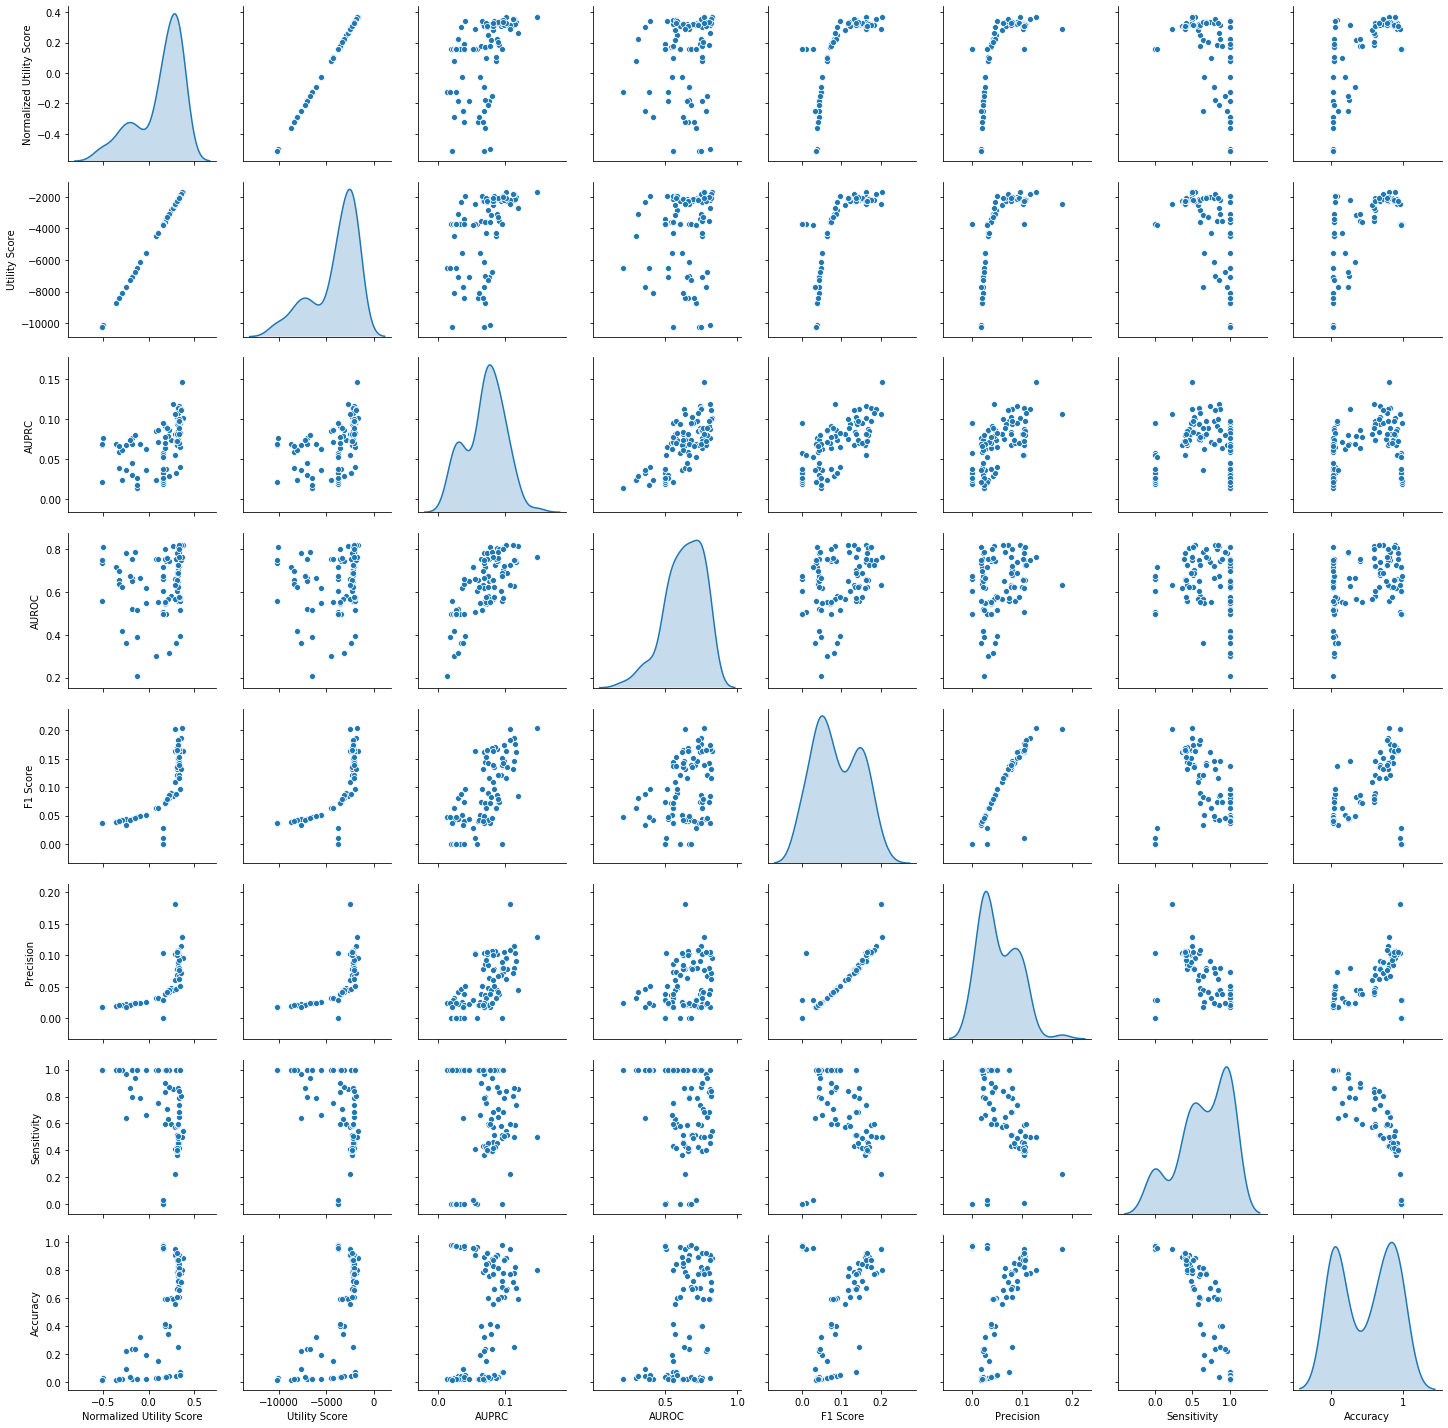

In [121]:
pairplot(df_metrics)
#plt.savefig('pairplot_metrics.png', bbox_inches='tight')

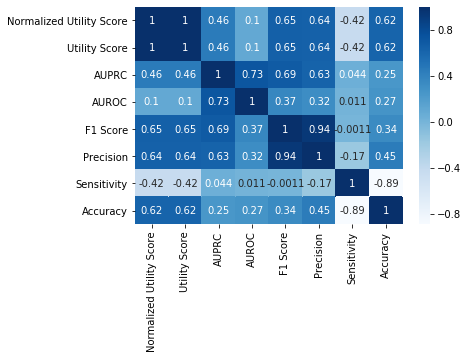

In [120]:
corplot(df_metrics)
#plt.savefig('corMatrix_metrics.png', bbox_inches='tight')

In [89]:
#df_architecture = df.loc[:, hyperparams['architecture']]
#architecture_col_names = ['Normalized Utility Score', 'RNN Layer Size', 'Number of RNN Layers', 'RNN Type',
#                         'RNN Dropout Rate', 'Dense Layer Size', 'Number of Dense Layers', 'Dense Layer Dropout Rate']
#df_architecture.columns = architecture_col_names

Text(0, 0.5, 'Normalized Utility Score')

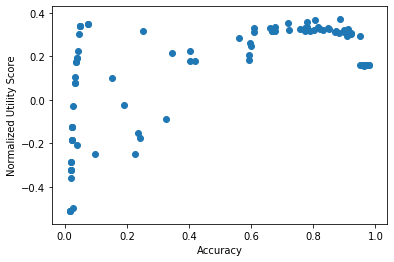

In [127]:
plt.scatter(df_metrics.loc[:,'Accuracy'], df_metrics.loc[:,'Normalized Utility Score'])
plt.xlabel('Accuracy')
plt.ylabel('Normalized Utility Score')